In [1]:
from class_linking import NPLinker_classes

In [2]:
# load local crusemann data
npl = NPLinker_classes({'dataset': {'root': '/mnt/scratch/louwe015/NPLinker/own/nplinker_shared/crusemann_3ids_AS6-AS3_30-11/'}})
npl.load_data()
npl.read_class_info()

14:24:52 [INFO] config.py:121, Loading from local data in directory /mnt/scratch/louwe015/NPLinker/own/nplinker_shared/crusemann_3ids_AS6-AS3_30-11/
14:24:53 [WARNING] loader.py:46, WARNING: unable to find extra_nodes_file in path "/mnt/scratch/louwe015/NPLinker/own/nplinker_shared/crusemann_3ids_AS6-AS3_30-11/quantification_table_reformatted/*.csv"
14:24:53 [WARNING] loader.py:46, WARNING: unable to find metadata_table_file in path "/mnt/scratch/louwe015/NPLinker/own/nplinker_shared/crusemann_3ids_AS6-AS3_30-11/metadata_table/metadata_table*.txt"
14:24:53 [WARNING] loader.py:46, WARNING: unable to find quantification_table_file in path "/mnt/scratch/louwe015/NPLinker/own/nplinker_shared/crusemann_3ids_AS6-AS3_30-11/quantification_table/quantification_table*.csv"
14:24:53 [INFO] loader.py:80, Trying to discover correct bigscape directory under /mnt/scratch/louwe015/NPLinker/own/nplinker_shared/crusemann_3ids_AS6-AS3_30-11/bigscape
14:24:53 [INFO] loader.py:83, Found network files direc

In [3]:
# Basic functionality
# ===================
#
# Once you have an NPLinker object with all data loaded, there are a collection of simple
# methods and properties you can use to access objects and metadata. Some examples are 
# given below, see https://nplinker.readthedocs.io/en/latest/ for a complete API description.

# configuration/dataset metadata
# - a copy of the configuration as parsed from the .toml file (dict)
print(npl.config) 
# - the path to the directory where various nplinker data files are located (e.g. the 
#   default configuration file template) (str)
print(npl.data_dir)
# - a dataset ID, derived from the path for local datasets or the paired platform ID
#   for datasets loaded from that source (str)
print(npl.dataset_id)
# - the root directory for the current dataset (str)
print(npl.root_dir)

# objects
# - you can directly access lists of each of the 4 object types:
print('BGCs:', len(npl.bgcs))
print('GCFs:', len(npl.gcfs)) # contains GCF objects
print('Spectra:', len(npl.spectra)) # contains Spectrum objects
print('Molecular Families:', len(npl.molfams)) # contains MolecularFamily objects

{'loglevel': 'INFO', 'logfile': '', 'log_to_stdout': True, 'repro_file': '', 'dataset': {'root': '/mnt/scratch/louwe015/NPLinker/own/nplinker_shared/crusemann_3ids_AS6-AS3_30-11/', 'overrides': {}, 'platform_id': ''}, 'antismash': {'antismash_format': 'default', 'ignore_spaces': False}, 'docker': {'run_bigscape': True, 'extra_bigscape_parameters': ''}, 'webapp': {'tables_metcalf_threshold': 2.0}, 'scoring': {'rosetta': {}}}
../prototype/nplinker/data

/mnt/scratch/louwe015/NPLinker/own/nplinker_shared/crusemann_3ids_AS6-AS3_30-11/
BGCs: 5869
GCFs: 1581
Spectra: 13667
Molecular Families: 8346


In [4]:
mc = npl.scoring_method('metcalf')

# Now mc is an instance of the class that implements Metcalf scoring. Once
# you have such an instance, you may change any of the parameters it exposes.
# In the case of Metcalf scoring, the following parameters are currently exposed:
# - cutoff (float): the scoring threshold. Links with scores less than this are excluded
# - standardised (bool): set to True to use standardised scores (default), False for regular
mc.cutoff = 2.5
mc.standardised = True

results = npl.get_links(npl.gcfs, mc, and_mode=True)

# get_links returns an instance of a class called LinkCollection. This provides a wrapper
# around the results of the scoring operation and has various useful properties/methods:
#
# - len(results) or .source_count will tell you how many of the input_objects were found to have links
print('Number of results: {}'.format(len(results)))
# - .sources is a list of those objects
objects_with_links = results.sources
# - .links is a dict with structure {input_object: {linked_object: ObjectLink}} 
objects_and_link_info = results.links
# - .get_all_targets() will return a flat list of *all* the linked objects (for all sources)
all_targets = results.get_all_targets() 
# - .methods is a list of the scoring methods passed to get_links
methods = results.methods

14:34:49 [INFO] methods.py:436, MetcalfScoring.setup (bgcs=5869, gcfs=1581, spectra=13667, molfams=8346, strains=154)
14:34:51 [INFO] methods.py:476, MetcalfScoring.setup completed
Number of results: 1581


In [5]:
# example of a good score, (predicted) NRP linking to a (predicted) peptide like spectrum
npl.class_linking_score(list(npl.gcfs)[0], list(npl.spectra)[500])

[(0.7553763440860215,
  'mibig_classes',
  'cf_superclass',
  'NRP',
  'Organic acids and derivatives'),
 (0.6419354838709678,
  'as_classes',
  'cf_superclass',
  'NRPS',
  'Organic acids and derivatives'),
 (0.4583333333333333,
  'mibig_classes',
  'cf_subclass',
  'NRP',
  'Amino acids, peptides, and analogues'),
 (0.4435483870967742,
  'mibig_classes',
  'cf_class',
  'NRP',
  'Carboxylic acids and derivatives'),
 (0.3718861209964413,
  'as_classes',
  'cf_subclass',
  'NRPS',
  'Amino acids, peptides, and analogues'),
 (0.3403225806451613,
  'as_classes',
  'cf_class',
  'NRPS',
  'Carboxylic acids and derivatives'),
 (0.017241379310344827,
  'mibig_classes',
  'npc_superclass',
  'NRP',
  'Nucleosides'),
 (0.014466546112115732,
  'mibig_classes',
  'npc_pathway',
  'NRP',
  'Carbohydrates'),
 (0.008849557522123894, 'as_classes', 'npc_superclass', 'NRPS', 'Nucleosides'),
 (0.007352941176470588, 'as_classes', 'npc_pathway', 'NRPS', 'Carbohydrates'),
 (0, 'mibig_classes', 'npc_class

In [6]:
# example of a bad score, (predicted) NRP linking to an (predicted) alkaloid like spectrum
npl.class_linking_score(list(npl.gcfs)[0], list(npl.spectra)[0])

[(0.17902350813743217, 'mibig_classes', 'npc_pathway', 'NRP', 'Alkaloids'),
 (0.13655462184873948, 'as_classes', 'npc_pathway', 'NRPS', 'Alkaloids'),
 (0.03763440860215054, 'mibig_classes', 'cf_superclass', 'NRP', 'Benzenoids'),
 (0.03225806451612903,
  'mibig_classes',
  'cf_class',
  'NRP',
  'Benzene and substituted derivatives'),
 (0.02258064516129032, 'as_classes', 'cf_superclass', 'NRPS', 'Benzenoids'),
 (0.012903225806451613,
  'as_classes',
  'cf_class',
  'NRPS',
  'Benzene and substituted derivatives'),
 (0.0, 'mibig_classes', 'cf_subclass', 'NRP', 'Carboxylic acid derivatives'),
 (0.0, 'as_classes', 'cf_subclass', 'NRPS', 'Carboxylic acid derivatives')]

## Try to filter all the links and see how many remain

In [7]:
cs_cutoff = 0.25
from nplinker.nplinker import Spectrum

In [8]:
# try first only including gcf-spectrum links
# from nplinker.nplinker import Spectrum
# results.filter_targets(lambda spec: isinstance(spec, Spectrum))

In [9]:
# # The link data inside the LinkCollection object is itself stored in ObjectLink objects.
# # Each instance of an ObjectLink represents a link between a given pair of objects as
# # determined by 1 or more scoring methods. 
# #
# # ObjectLinks have the following basic attributes:
# # - .source: the input object provided to the method
# # - .target: the linked object
# # - .methods: a list of the methods that found this link
# # - .shared_strains: a list of Strain objects (possibly empty) shared between .source and .target
# # - .data(<method_object>): return the output of <method_object> for this link (e.g. any score values)
# # 
# # You can also retrieve any method-specific info for a link by subscripting these objects with 
# # the appropriate method object, e.g. metcalf_link_data = object_link[mc] 

# # This shows how to iterate over the link information from result.links. In the body of the loop
# # <obj> will be one of  the original objects supplied to get_links and <result> will be a dict 
# # with structure {linked_object: ObjectLink} (indicating <obj> is linked to <linked_object> according to
# # the information stored in the ObjectLink)
# i = 0
# for obj, result in results.links.items():
#     # display the object, the number of links it has, and the number of methods that were used to get them
#     print('Results for object: {}, {} total links, {} methods used'.format(obj, len(result), results.method_count))
    
#     # sorting is method-dependent since they might have very different "scores", so you should
#     # use the original object to do this. For Metcalf scoring, this will return the ObjectLinks sorted
#     # by their Metcalf scores. 
#     sorted_links = results.get_sorted_links(mc, obj)
#     # or if you wanted them in the reverse order:
#     # sorted_links = results.get_sorted_links(mc, obj, reverse=True)
    
#     # Now display some link information for each link associated with <obj>.
#     # link_data[<method_object>] will return the per-link data generated by that 
#     # method. Here the metcalf method simply returns the link score as a floating point value,
#     # but other methods may return more complex objects. 
#     # 
#     # Each scoring method also has a format_data method which should provide a relatively short 
#     # human-readable summary of the data, as a quick way to print and examine results. 
#     for link_data in sorted_links:
#         if isinstance(link_data.target, Spectrum):
#             print('  --> [{}] {} | {} | shared strains = {}'.format(','.join(method.name for method in link_data.methods), 
#                                                                     link_data.target, 
#                                                                     mc.format_data(link_data[mc]), 
#                                                                     len(link_data.shared_strains)))
        
#     # alternatively, if you don't care about ordering, you can just iterate directly over the 
#     # linked objects like this:
#     # for link_target, link_data in result.items():
#     #    print(link_target, link_data)
#     if i == 2:
#         break
#     i += 1

In [10]:
obj = npl.gcfs[504]
result = results.links[obj]
print('Results for object: {}, {} total links, {} methods used'.format(obj, len(result), results.method_count))
sorted_links = results.get_sorted_links(mc, obj)
num_links = 0
num_filtered_links = 0
no_scores = 0
for link_data in sorted_links:
        if isinstance(link_data.target, Spectrum):
            num_links += 1
#             print('  --> [{}] {} | {} | shared strains = {}'.format(','.join(method.name for method in link_data.methods), 
#                                                                     link_data.target, 
#                                                                     mc.format_data(link_data[mc]), 
#                                                                     len(link_data.shared_strains)))
            cl_score = npl.class_linking_score(obj, link_data.target)
            if cl_score:
                if cl_score[0][0] > cs_cutoff:
                    num_filtered_links += 1
                    print('  --> [{}] {} | {} | shared strains = {}'.format(','.join(method.name for method in link_data.methods), 
                                                                        link_data.target, 
                                                                        mc.format_data(link_data[mc]), 
                                                                        len(link_data.shared_strains)))
                    print(cl_score[0])
            else:
                no_scores += 1
print("Number of links:", num_links)
print("Number of filtered links:", num_filtered_links + no_scores, f"of which {no_scores} without linking score")

Results for object: GCF(id=504, class=Others, gcf_id=301, strains=1), 319 total links, 1 methods used
  --> [metcalf] Spectrum(id=3167, spectrum_id=82943, strains=2) | 8.7178 | shared strains = 1
(0.47073170731707314, 'mibig_classes', 'npc_pathway', 'Other', 'Alkaloids')
  --> [metcalf] Spectrum(id=3909, spectrum_id=93578, strains=2) | 8.7178 | shared strains = 1
(0.47073170731707314, 'mibig_classes', 'npc_pathway', 'Other', 'Alkaloids')
  --> [metcalf] Spectrum(id=8039, spectrum_id=151423, strains=2) | 8.7178 | shared strains = 1
(0.4691358024691358, 'as_classes', 'cf_superclass', 'other', 'Organoheterocyclic compounds')
  --> [metcalf] Spectrum(id=8040, spectrum_id=151424, strains=2) | 8.7178 | shared strains = 1
(0.4691358024691358, 'as_classes', 'cf_superclass', 'other', 'Organoheterocyclic compounds')
  --> [metcalf] Spectrum(id=9891, spectrum_id=179938, strains=2) | 8.7178 | shared strains = 1
(0.4691358024691358, 'as_classes', 'cf_superclass', 'other', 'Organoheterocyclic compou

In [11]:
# The link data inside the LinkCollection object is itself stored in ObjectLink objects.
# Each instance of an ObjectLink represents a link between a given pair of objects as
# determined by 1 or more scoring methods. 
#
# ObjectLinks have the following basic attributes:
# - .source: the input object provided to the method
# - .target: the linked object
# - .methods: a list of the methods that found this link
# - .shared_strains: a list of Strain objects (possibly empty) shared between .source and .target
# - .data(<method_object>): return the output of <method_object> for this link (e.g. any score values)
# 
# You can also retrieve any method-specific info for a link by subscripting these objects with 
# the appropriate method object, e.g. metcalf_link_data = object_link[mc] 

# This shows how to iterate over the link information from result.links. In the body of the loop
# <obj> will be one of  the original objects supplied to get_links and <result> will be a dict 
# with structure {linked_object: ObjectLink} (indicating <obj> is linked to <linked_object> according to
# the information stored in the ObjectLink)
# i = 0
all_num_links = []
all_num_filtered_links = []
all_no_scores = []
filt_cl_scores = []
zero_scores = []
# loop through links for all gcfs
for obj, result in results.links.items():
#     print(i)
    sorted_links = results.get_sorted_links(mc, obj)
    num_links = 0
    num_filtered_links = 0
    no_scores = 0
    # for each gcf, loop through link
    for link_data in sorted_links:
            if isinstance(link_data.target, Spectrum):
                num_links += 1
    #             print('  --> [{}] {} | {} | shared strains = {}'.format(','.join(method.name for method in link_data.methods), 
    #                                                                     link_data.target, 
    #                                                                     mc.format_data(link_data[mc]), 
    #                                                                     len(link_data.shared_strains)))
                cl_score = npl.class_linking_score(obj, link_data.target)
                # cl_score = npl....
                if cl_score:
                    if cl_score[0][0] > cs_cutoff:
                        num_filtered_links += 1
#                         print('  --> [{}] {} | {} | shared strains = {}'.format(','.join(method.name for method in link_data.methods), 
#                                                                             link_data.target, 
#                                                                             mc.format_data(link_data[mc]), 
#                                                                             len(link_data.shared_strains)))
                    else:
                        filt_cl_scores.append(cl_score)
                        for elem in cl_score:
                            if elem[0] == 0:
                                zero_scores.append((elem, obj, link_data.target))
                else:
                    no_scores += 1
    all_num_links.append(num_links)
    all_num_filtered_links.append(num_filtered_links)
    all_no_scores.append(no_scores)
#     print("Number of links:", num_links)
#     print("Number of filtered links:", num_filtered_links + no_scores, f"of which {no_scores} without linking score")

In [12]:
just_scores = list(zip(*[fcl2 for fcl1 in filt_cl_scores for fcl2 in fcl1]))[0]
len([sc for sc in just_scores if sc==0])

1282162

In [13]:
filt_cl_scores[:10]

[[(0.2302158273381295, 'as_classes', 'npc_pathway', 'NRPS-like', 'Alkaloids'),
  (0.17902350813743217, 'mibig_classes', 'npc_pathway', 'NRP', 'Alkaloids'),
  (0.13655462184873948, 'as_classes', 'npc_pathway', 'NRPS', 'Alkaloids'),
  (0.13655462184873948, 'as_classes', 'npc_pathway', 'NRPS', 'Alkaloids'),
  (0.0, 'mibig_classes', 'cf_superclass', 'NRP', 'Hydrocarbon derivatives'),
  (0, 'mibig_classes', 'cf_class', 'NRP', 'Organic oxides'),
  (0.0, 'as_classes', 'cf_superclass', 'NRPS-like', 'Hydrocarbon derivatives'),
  (0.0, 'as_classes', 'cf_superclass', 'NRPS', 'Hydrocarbon derivatives'),
  (0.0, 'as_classes', 'cf_superclass', 'NRPS', 'Hydrocarbon derivatives'),
  (0, 'as_classes', 'cf_class', 'NRPS-like', 'Organic oxides'),
  (0, 'as_classes', 'cf_class', 'NRPS', 'Organic oxides'),
  (0, 'as_classes', 'cf_class', 'NRPS', 'Organic oxides')],
 [(0.09734513274336283,
   'as_classes',
   'cf_superclass',
   'NRPS-like',
   'Lipids and lipid-like molecules'),
  (0.05309734513274336,
   

In [14]:
assert len(all_num_links) == len(all_num_filtered_links)
assert len(all_num_filtered_links)==len(all_no_scores)

In [15]:
import numpy as np
print(len(all_num_links))
np.mean(all_num_links), np.mean(all_num_filtered_links), np.mean(all_no_scores)

1581


(549.8481973434535, 128.4459203036053, 223.7020872865275)

In [16]:
# add no scores and all_num_filtered_links
all_filt_links = [filt + nosc for filt, nosc in zip(all_num_filtered_links, all_no_scores)]

In [17]:
np.mean(all_num_links), np.mean(all_filt_links), max(all_num_links), max(all_filt_links)

(549.8481973434535, 352.1480075901328, 2971, 2470)

In [18]:
import matplotlib.pyplot as plt

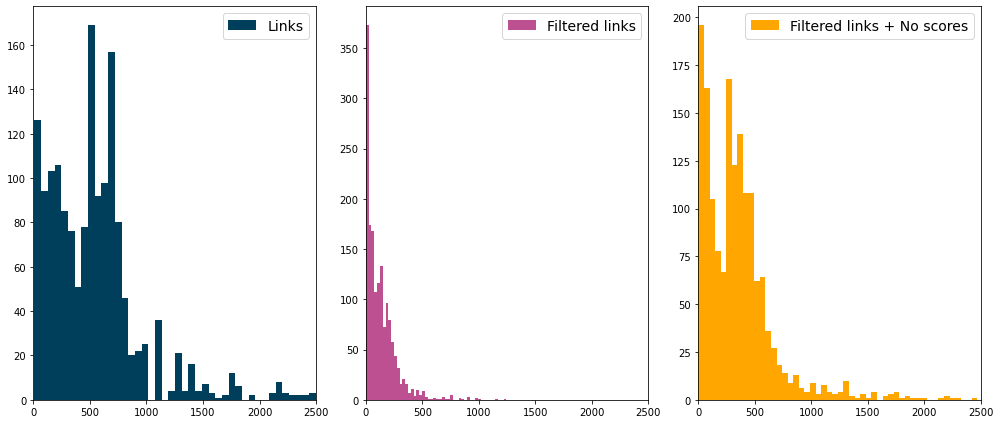

In [19]:
labels = ["Links", "Filtered links", "Filtered links + No scores"]
colours = ["#003f5c", "#bc5090", "#ffa600"]
xs = [all_num_links, all_num_filtered_links, all_filt_links]
lg_size = 14
custom_xlim = (-1, 2500)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
(ax0, ax1, ax2) = ax

ax0.hist(xs[0], bins=50, histtype='bar', stacked=True, label=labels[0], color=colours[0])
ax0.legend(prop={'size': lg_size})
ax1.hist(xs[1], bins=50, histtype='bar', stacked=True, label=labels[1], color=colours[1])
ax1.legend(prop={'size': lg_size})
ax2.hist(xs[2], bins=50, histtype='bar', stacked=True, label=labels[2], color=colours[2])
ax2.legend(prop={'size': lg_size})

plt.setp(ax, xlim=custom_xlim)
fig.tight_layout()
plt.show()

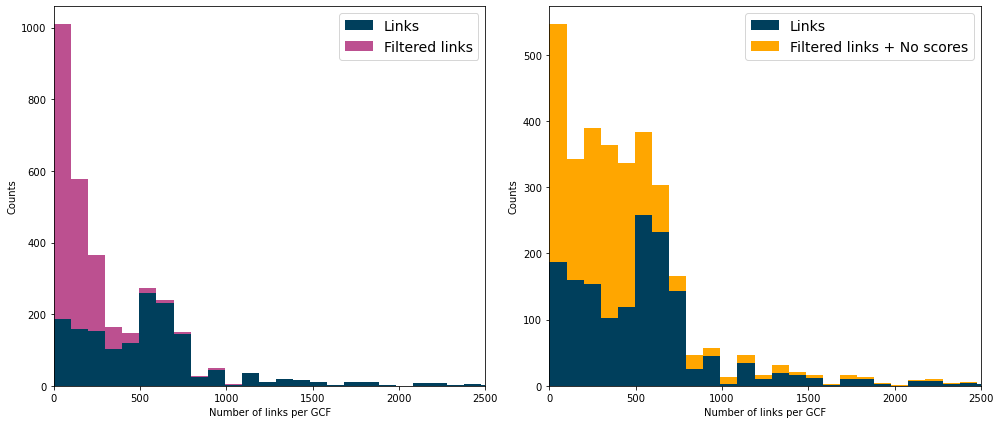

In [20]:
labels = ["Links", "Filtered links", "Filtered links + No scores"]
colours = ["#003f5c", "#bc5090", "#ffa600"]
xs = [all_num_links, all_num_filtered_links, all_filt_links]
# x1 = [all_num_links, all_num_filtered_links]
# x2 = [all_num_links, all_filt_links]
lg_size = 14
custom_xlim = (-1, 2500)
n_bins = 30
links_title = "Number of links per GCF"
count_title = "Counts"

# plt.hist(xs, bins=50, density=True, histtype='bar', stacked=True, label=labels, color=colours)
# plt.legend(prop={'size': lg_size})
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
(ax0, ax1) = ax

ax0.hist(xs[:2], bins=n_bins, density=False, histtype='bar', stacked=True, label=labels[:2], color=colours[:2])
ax0.legend(prop={'size': lg_size})
ax1.hist([xs[0], xs[2]], bins=n_bins, density=False, histtype='bar', stacked=True, label=[labels[0], labels[2]],
         color=[colours[0], colours[2]])
ax1.legend(prop={'size': lg_size})
# ax2.hist(x[2], bins=50, density=True, histtype='bar', stacked=True, label=labels[2], color=colours[2])
# ax2.legend(prop={'size': lg_size})

plt.setp(ax, xlim=custom_xlim, xlabel=links_title, ylabel=count_title)
fig.tight_layout()
plt.show()

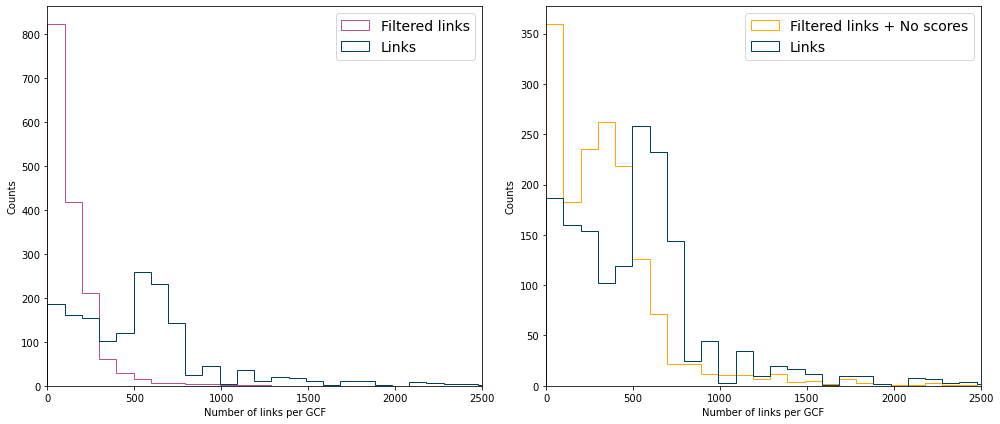

In [21]:
labels = ["Links", "Filtered links", "Filtered links + No scores"]
colours = ["#003f5c", "#bc5090", "#ffa600"]
xs = [all_num_links, all_num_filtered_links, all_filt_links]
# x1 = [all_num_links, all_num_filtered_links]
# x2 = [all_num_links, all_filt_links]
lg_size = 14
custom_xlim = (-1, 2500)
n_bins = 30
links_title = "Number of links per GCF"
count_title = "Counts"

# plt.hist(xs, bins=50, density=True, histtype='bar', stacked=True, label=labels, color=colours)
# plt.legend(prop={'size': lg_size})
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
(ax0, ax1) = ax

ax0.hist(xs[:2], bins=n_bins, density=False, histtype='step', stacked=False, label=labels[:2], color=colours[:2])
ax0.legend(prop={'size': lg_size})
ax1.hist([xs[0], xs[2]], bins=n_bins, density=False, histtype='step', stacked=False, label=[labels[0], labels[2]],
         color=[colours[0], colours[2]])
ax1.legend(prop={'size': lg_size})
# ax2.hist(x[2], bins=50, density=True, histtype='bar', stacked=True, label=labels[2], color=colours[2])
# ax2.legend(prop={'size': lg_size})

plt.setp(ax, xlim=custom_xlim, xlabel=links_title, ylabel=count_title)
fig.tight_layout()
plt.show()

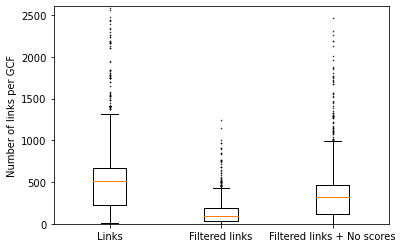

In [22]:
labels = ["Links", "Filtered links", "Filtered links + No scores"]
colours = ["#003f5c", "#bc5090", "#ffa600"]
xs = [all_num_links, all_num_filtered_links, all_filt_links]
lg_size = 14
custom_xlim = (-1, 2607)
links_title = "Number of links per GCF"

# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
# (ax0, ax1, ax2) = ax

# ax0.boxplot(x[0], bins=50, density=True, histtype='bar', stacked=True, label=labels[0], color=colours[0])
# ax0.legend(prop={'size': lg_size})
# ax1.hist(x[1], bins=50, density=True, histtype='bar', stacked=True, label=labels[1], color=colours[1])
# ax1.legend(prop={'size': lg_size})
# ax2.hist(x[2], bins=50, density=True, histtype='bar', stacked=True, label=labels[2], color=colours[2])
# ax2.legend(prop={'size': lg_size})

plt.boxplot(xs, labels=labels, flierprops={"markersize": 0.5})

# plt.setp(ax, xlim=custom_xlim)
plt.ylim(custom_xlim)
plt.ylabel(links_title)
# fig.tight_layout()
plt.show()

<AxesSubplot:>

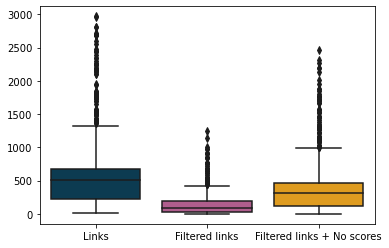

In [23]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({lab: x for x, lab in zip(xs, labels)})
df
sns.boxplot(data=df, palette=colours)
# plt.x_label = "Number of links per GCF"

## Investigate classes with 0 links

In [24]:
# this is fine
chem_cols = {}
for chem_lvl in npl.class_links.class_links["as_classes"]:
    cols = npl.class_links.class_links["as_classes"][chem_lvl].columns
    chem_cols[chem_lvl] = list(cols)

all_cols = set([v for vals in chem_cols.values() for v in vals])
for chem_lvl in npl.class_links.class_links["as_classes"]:
    cols = npl.class_links.class_links["as_classes"][chem_lvl].columns
    col_not_in_all = [c for c in all_cols if c not in cols]
    print(chem_lvl, len(npl.class_links.class_links["as_classes"][chem_lvl].sum(axis=0)), col_not_in_all)
len(set([v for vals in chem_cols.values() for v in vals]))

cf_kingdom 51 ['acyl_amino_acids']
cf_superclass 51 ['acyl_amino_acids']
cf_class 51 ['acyl_amino_acids']
cf_direct_parent 51 ['acyl_amino_acids']
npc_class 51 ['acyl_amino_acids']
npc_superclass 51 ['acyl_amino_acids']
npc_pathway 51 ['acyl_amino_acids']
npc_isglycoside 52 []
cf_subclass 46 ['head_to_tail', 'linaridin', 'proteusin', 'tropodithietic-acid', 'acyl_amino_acids', 'sactipeptide']


52

In [25]:
chem_cols

{'cf_kingdom': ['T1PKS',
  'oligosaccharide',
  'NRPS-like',
  'PKS-like',
  'butyrolactone',
  'NRPS',
  'arylpolyene',
  'other',
  'transAT-PKS',
  'indole',
  'T3PKS',
  'transAT-PKS-like',
  'lanthipeptide',
  'hserlactone',
  'furan',
  'T2PKS',
  'ladderane',
  'aminocoumarin',
  'phenazine',
  'nucleoside',
  'amglyccycl',
  'blactam',
  'siderophore',
  'betalactone',
  'melanin',
  'bacteriocin',
  'bottromycin',
  'cyanobactin',
  'LAP',
  'thiopeptide',
  'lassopeptide',
  'linaridin',
  'microviridin',
  'proteusin',
  'head_to_tail',
  'sactipeptide',
  'terpene',
  'TfuA-related',
  'fungal-RiPP',
  'resorcinol',
  'CDPS',
  'ectoine',
  'hglE-KS',
  'PUFA',
  'PBDE',
  'phosphonate',
  'fused',
  'RaS-RiPP',
  'PpyS-KS',
  'tropodithietic-acid',
  'phosphoglycolipid'],
 'cf_superclass': ['T1PKS',
  'oligosaccharide',
  'NRPS-like',
  'PKS-like',
  'butyrolactone',
  'NRPS',
  'arylpolyene',
  'other',
  'transAT-PKS',
  'indole',
  'T3PKS',
  'transAT-PKS-like',
  'lant

In [26]:
set([v for vals in chem_cols.values() for v in vals])

{'CDPS',
 'LAP',
 'NRPS',
 'NRPS-like',
 'PBDE',
 'PKS-like',
 'PUFA',
 'PpyS-KS',
 'RaS-RiPP',
 'T1PKS',
 'T2PKS',
 'T3PKS',
 'TfuA-related',
 'acyl_amino_acids',
 'amglyccycl',
 'aminocoumarin',
 'arylpolyene',
 'bacteriocin',
 'betalactone',
 'blactam',
 'bottromycin',
 'butyrolactone',
 'cyanobactin',
 'ectoine',
 'fungal-RiPP',
 'furan',
 'fused',
 'head_to_tail',
 'hglE-KS',
 'hserlactone',
 'indole',
 'ladderane',
 'lanthipeptide',
 'lassopeptide',
 'linaridin',
 'melanin',
 'microviridin',
 'nucleoside',
 'oligosaccharide',
 'other',
 'phenazine',
 'phosphoglycolipid',
 'phosphonate',
 'proteusin',
 'resorcinol',
 'sactipeptide',
 'siderophore',
 'terpene',
 'thiopeptide',
 'transAT-PKS',
 'transAT-PKS-like',
 'tropodithietic-acid'}

In [27]:
as_class_sum = '''acyl_amino_acids	N-acyl amino acid cluster	4.0	4.1
aminocoumarin	Aminocoumarin cluster	<= 3.0	<= 3.0
amglyccycl	Aminoglycoside/aminocyclitol cluster	<= 3.0	<= 3.0
arylpolyene	Aryl polyene cluster	<= 3.0	<= 3.0
betalactone	beta-lactone containing protease inhibitor	5.0	5.0
blactam	β-lactam cluster	<= 3.0	<= 3.0
bottromycin	Bottromycin cluster	<= 3.0	<= 3.0
butyrolactone	Butyrolactone cluster	<= 3.0	<= 3.0
CDPS	tRNA-dependent cyclodipeptide synthases	5.0	5.0
cyanobactin	Cyanobactins like patellamide (AY986476)	<= 3.0	6.0
cyclic-lactone-autoinducer	agrD-like cyclic lactone autoinducer peptides (AF001782)	6.0	6.0
ectoine	Ectoine cluster	<= 3.0	<= 3.0
epipeptide	D-amino-acid containing RiPPs such as yydF (D78193)	6.0	6.0
fatty_acid	Fatty acid cluster (loose strictness, likely from primary metabolism)	<= 3.0	4.2
furan	Furan cluster	<= 3.0	5.0
fungal-RiPP	Fungal RiPP with POP or UstH peptidase types and a modification	5.0	5.0
glycocin	Glycocin cluster	<= 3.0	<= 3.0
guanidinotides	Pheganomycin-style protein ligase-containing cluster	4.0	6.0
halogenated	Cluster containing a halogenase and thus potentially generating a halogenated product	5.0	5.0
hglE-KS	heterocyst glycolipid synthase-like PKS	5.0	5.0
hserlactone	Homoserine lactone cluster	<= 3.0	<= 3.0
indole	Indole cluster	<= 3.0	4.0
LAP	Linear azol(in)e-containing peptides	<= 3.0	6.0
ladderane	Ladderane cluster	<= 3.0	<= 3.0
lantipeptide class I	Class I lanthipeptide clusters like nisin	4.2	6.0
lantipeptide class II	Class II lanthipeptide clusters like mutacin II (U40620)	4.2	6.0
lantipeptide class III	Class III lanthipeptide clusters like labyrinthopeptin (FN178622)	4.2	6.0
lantipeptide class IV	Class IV lanthipeptide clusters like venezuelin (HQ328852)	4.2	6.0
lantipeptide class V	Glycosylated lanthipeptide/linaridin hybrids like MT210103	5.1	6.0
lassopeptide	Lasso peptide cluster	<= 3.0	5.0
linaridin	Linear arid peptide such as cypemycin (HQ148718) and salinipeptin (MG788286)	<= 3.0	<= 3.0
lipolanthine	Lanthipeptide class containing N-terminal fatty acids such as MG673929	5.0	5.0
melanin	Melanin cluster	<= 3.0	<= 3.0
microviridin	Microviridin cluster	<= 3.0	<= 3.0
NAGGN	N-acetylglutaminylglutamine amide	5.0	5.0
NAPAA	non-alpha poly-amino acids like e-Polylysin	6.0	6.0
nrps	Non-ribosomal peptide synthetase cluster	<= 3.0	<= 3.0
nrps-like	NRPS-like fragment	5.0	5.0
nucleoside	Nucleoside cluster	<= 3.0	5.0
oligosaccharide	Oligosaccharide cluster	<= 3.0	<= 3.0
other	Cluster containing a secondary metabolite-related protein that does not fit into any other category	4.0	5.0
PBDE	Polybrominated diphenyl ether cluster	4.1	4.1
phenazine	Phenazine cluster	<= 3.0	<= 3.0
phosphoglycolipid	Phosphoglycolipid cluster	<= 3.0	<= 3.0
phosphonate	Phosphonate cluster	<= 3.0	<= 3.0
PKS-like	Other types of PKS cluster	5.0	5.0
PpyS-KS	PPY-like pyrone cluster	4.2	4.2
proteusin	Proteusin cluster	<= 3.0	<= 3.0
PUFA	Polyunsaturated fatty acid cluster	<= 3.0	<= 3.0
pyrrolidine	Pyrrolidines like described in BGC0001510	6.0	6.0
ranthipeptide	Cys-rich peptides (aka. SCIFF: six Cys in fourty-five) like in CP001581:3481278-3502939	6.0	6.0
RaS-RiPP	Streptide-like thioether-bond RiPPs	5.0	5.0
redox-cofactor	Redox-cofactors such as PQQ (NC_021985:1458906-1494876)	6.0	6.0
resorcinol	Resorcinol cluster	<= 3.0	<= 3.0
RiPP-like	Other unspecified ribosomally synthesised and post-translationally modified peptide product (RiPP) cluster	4.1	6.0
RRE-containing	RRE-element containing cluster	6.0	6.0
saccharide	Saccharide cluster (loose strictness, likely from primary metabolism)	<= 3.0	<= 3.0
sactipeptide	Sactipeptide cluster	<= 3.0	6.0
siderophore	Siderophore cluster	<= 3.0	<= 3.0
spliceotide	RiPPs containing plpX type spliceases (NZ_KB235920:17899-42115)	6.0	6.0
T1PKS	Type I PKS (Polyketide synthase)	<= 3.0	<= 3.0
T2PKS	Type II PKS	<= 3.0	5.0
T3PKS	Type III PKS	<= 3.0	<= 3.0
terpene	Terpene	<= 3.0	4.1
thioamitides	Thioamitide RiPPs as found in JOBF01000011	5.1	6.0
thioamide-NRP	Thioamide-containing non-ribosomal peptide	5.0	5.0
thiopeptide	Thiopeptide cluster	4.2	5.0
transAT-PKS	Trans-AT PKS	<= 3.0	5.0
transAT-PKS-like	Trans-AT PKS fragment, with trans-AT domain not found	<= 5.0	5.0
tropodithietic-acid	Tropodithietic acid cluster	5.0	5.0'''

In [28]:
in_as_names = [line.split("\t")[0] for line in as_class_sum.split("\n")]
print(len(in_as_names))
in_as_names

70


['acyl_amino_acids',
 'aminocoumarin',
 'amglyccycl',
 'arylpolyene',
 'betalactone',
 'blactam',
 'bottromycin',
 'butyrolactone',
 'CDPS',
 'cyanobactin',
 'cyclic-lactone-autoinducer',
 'ectoine',
 'epipeptide',
 'fatty_acid',
 'furan',
 'fungal-RiPP',
 'glycocin',
 'guanidinotides',
 'halogenated',
 'hglE-KS',
 'hserlactone',
 'indole',
 'LAP',
 'ladderane',
 'lantipeptide class I',
 'lantipeptide class II',
 'lantipeptide class III',
 'lantipeptide class IV',
 'lantipeptide class V',
 'lassopeptide',
 'linaridin',
 'lipolanthine',
 'melanin',
 'microviridin',
 'NAGGN',
 'NAPAA',
 'nrps',
 'nrps-like',
 'nucleoside',
 'oligosaccharide',
 'other',
 'PBDE',
 'phenazine',
 'phosphoglycolipid',
 'phosphonate',
 'PKS-like',
 'PpyS-KS',
 'proteusin',
 'PUFA',
 'pyrrolidine',
 'ranthipeptide',
 'RaS-RiPP',
 'redox-cofactor',
 'resorcinol',
 'RiPP-like',
 'RRE-containing',
 'saccharide',
 'sactipeptide',
 'siderophore',
 'spliceotide',
 'T1PKS',
 'T2PKS',
 'T3PKS',
 'terpene',
 'thioamitid

In [29]:
cur_products = set(product for bgc in npl.bgcs for product in bgc.product_prediction.split('.'))
cur_products, len(cur_products)

({'CDPS',
  'LAP',
  'NAGGN',
  'NAPAA',
  'NRPS',
  'NRPS-like',
  'PKS-like',
  'RRE-containing',
  'RiPP-like',
  'T1PKS',
  'T2PKS',
  'T3PKS',
  'amglyccycl',
  'arylpolyene',
  'bacteriocin',
  'betalactone',
  'blactam',
  'bottromycin',
  'butyrolactone',
  'cf_fatty_acid',
  'cf_putative',
  'cf_saccharide',
  'ectoine',
  'furan',
  'fused',
  'guanidinotides',
  'hglE-KS',
  'indole',
  'ladderane',
  'lanthipeptide-class-i',
  'lanthipeptide-class-ii',
  'lanthipeptide-class-iii',
  'lanthipeptide-class-iv',
  'lanthipeptide-class-v',
  'lantipeptide',
  'lassopeptide',
  'linaridin',
  'lipolanthine',
  'melanin',
  'nrps',
  'nucleoside',
  'oligosaccharide',
  'other',
  'otherks',
  'phenazine',
  'phosphoglycolipid',
  'phosphonate',
  'prodigiosin',
  'pyrrolidine',
  'ranthipeptide',
  'redox-cofactor',
  'siderophore',
  't1pks',
  't2pks',
  't3pks',
  'terpene',
  'thioamide-NRP',
  'thioamitides',
  'thiopeptide',
  'transAT-PKS',
  'transAT-PKS-like',
  'transat

In [30]:
cur_products - set(in_as_names), set(in_as_names) - cur_products

({'NRPS',
  'NRPS-like',
  'bacteriocin',
  'cf_fatty_acid',
  'cf_putative',
  'cf_saccharide',
  'fused',
  'lanthipeptide-class-i',
  'lanthipeptide-class-ii',
  'lanthipeptide-class-iii',
  'lanthipeptide-class-iv',
  'lanthipeptide-class-v',
  'lantipeptide',
  'otherks',
  'prodigiosin',
  't1pks',
  't2pks',
  't3pks',
  'transatpks'},
 {'PBDE',
  'PUFA',
  'PpyS-KS',
  'RaS-RiPP',
  'acyl_amino_acids',
  'aminocoumarin',
  'cyanobactin',
  'cyclic-lactone-autoinducer',
  'epipeptide',
  'fatty_acid',
  'fungal-RiPP',
  'glycocin',
  'halogenated',
  'hserlactone',
  'lantipeptide class I',
  'lantipeptide class II',
  'lantipeptide class III',
  'lantipeptide class IV',
  'lantipeptide class V',
  'microviridin',
  'nrps-like',
  'proteusin',
  'resorcinol',
  'saccharide',
  'sactipeptide',
  'spliceotide',
  'tropodithietic-acid'})

In [31]:
cur_products = set(''.join(''.join(cp.lower().split(' ')).split("-")) for cp in cur_products)
len(cur_products)

57

In [32]:
in_as_names = set(''.join(''.join(cp.lower().split(' ')).split("-")) for cp in in_as_names)
len(in_as_names)

70

In [33]:
cur_products - set(in_as_names), set(in_as_names) - cur_products

({'bacteriocin',
  'cf_fatty_acid',
  'cf_putative',
  'cf_saccharide',
  'fused',
  'lanthipeptideclassi',
  'lanthipeptideclassii',
  'lanthipeptideclassiii',
  'lanthipeptideclassiv',
  'lanthipeptideclassv',
  'lantipeptide',
  'otherks',
  'prodigiosin'},
 {'acyl_amino_acids',
  'aminocoumarin',
  'cyanobactin',
  'cycliclactoneautoinducer',
  'epipeptide',
  'fatty_acid',
  'fungalripp',
  'glycocin',
  'halogenated',
  'hserlactone',
  'lantipeptideclassi',
  'lantipeptideclassii',
  'lantipeptideclassiii',
  'lantipeptideclassiv',
  'lantipeptideclassv',
  'microviridin',
  'pbde',
  'ppysks',
  'proteusin',
  'pufa',
  'rasripp',
  'resorcinol',
  'saccharide',
  'sactipeptide',
  'spliceotide',
  'tropodithieticacid'})

In [34]:
from collections import defaultdict
crus_map = defaultdict(set)
for bgc in npl.bgcs:
    bgc_gcf = [gcf for gcf in npl.gcfs if bgc.id in set(b.id for b in gcf.bgcs)][0]
#     print(bgc_gcf.bigscape_class)
#     for product in bgc.product_prediction.split('.'):
#         print(product)
    product = bgc.product_prediction
    crus_map[product].add(bgc_gcf.bigscape_class)
crus_map

defaultdict(set,
            {'nrps': {'NRPS', 'Others', 'PKS-NRP_Hybrids'},
             'nrps.t1pks.otherks': {'PKS-NRP_Hybrids'},
             'nrps.phenazine': {'Others'},
             'nrps.t1pks': {'NRPS', 'PKS-NRP_Hybrids'},
             'NRPS': {'NRPS', 'Others', 'PKS-NRP_Hybrids'},
             'NRPS-like.NRPS': {'NRPS', 'Others', 'PKS-NRP_Hybrids'},
             'otherks.cf_fatty_acid.nrps.lantipeptide.t1pks': {'Others'},
             'otherks.cf_fatty_acid.oligosaccharide.nrps.t1pks': {'Others'},
             'nrps.cf_fatty_acid.t1pks': {'Others'},
             'nrps.t1pks.cf_fatty_acid': {'Others'},
             'NRPS.T1PKS': {'NRPS', 'Others', 'PKS-NRP_Hybrids'},
             'oligosaccharide.PKS-like.NRPS.T1PKS': {'NRPS', 'Others'},
             'nrps.t1pks.amglyccycl.lantipeptide': {'Others'},
             'NRPS-like.T1PKS': {'NRPS', 'Others', 'PKS-NRP_Hybrids'},
             'nrps.t3pks': {'PKS-NRP_Hybrids'},
             'T3PKS.NRPS': {'PKS-NRP_Hybrids'},
             

In [35]:
import pandas as pd
crus_map_df = pd.DataFrame.from_dict(crus_map, orient="index")
crus_map_df.sort_index(inplace=True)
crus_map_df.fillna("",inplace=True) 
crus_map_df.to_csv()

',0,1,2,3\nCDPS,Others,,,\nCDPS.T1PKS,Others,,,\nCDPS.terpene,Others,,,\nLAP,RiPPs,,,\nLAP.NRPS.thiopeptide,Others,,,\nLAP.RiPP-like,RiPPs,,,\nLAP.lanthipeptide-class-v.furan.thiopeptide,Others,,,\nLAP.siderophore.thiopeptide,Others,,,\nLAP.siderophore.thiopeptide.terpene,Others,,,\nLAP.terpene.hglE-KS,Others,,,\nLAP.thiopeptide,RiPPs,Others,,\nLAP.thiopeptide.RRE-containing,RiPPs,,,\nLAP.thiopeptide.T1PKS,Others,,,\nLAP.thiopeptide.terpene,Others,,,\nNAGGN,Others,,,\nNAPAA,NRPS,,,\nNAPAA.NRPS,NRPS,,,\nNAPAA.NRPS.terpene,Others,,,\nNAPAA.terpene.transAT-PKS,Others,,,\nNRPS,PKS-NRP_Hybrids,NRPS,Others,\nNRPS-like,PKS-NRP_Hybrids,NRPS,Others,\nNRPS-like.NRPS,PKS-NRP_Hybrids,NRPS,Others,\nNRPS-like.NRPS.T1PKS,PKS-NRP_Hybrids,NRPS,Others,\nNRPS-like.NRPS.T1PKS.betalactone,Others,,,\nNRPS-like.NRPS.T1PKS.lanthipeptide-class-ii,Others,,,\nNRPS-like.NRPS.terpene,Others,,,\nNRPS-like.PKS-like.NRPS,PKS-NRP_Hybrids,,,\nNRPS-like.RRE-containing,Others,,,\nNRPS-like.RRE-containing.T1PKS,NRPS,,,\nN

In [36]:
mibig_map = defaultdict(set)
for key, vals in npl.class_links._mibig_classes.items():
#     for val in vals[0][2]:
    val = '.'.join(vals[0][2])
    for val0 in vals[0][0]:
        mibig_map[val].add(val0)
mibig_map

defaultdict(set,
            {'T1PKS': {'Alkaloid',
              'NRP',
              'Other',
              'Polyketide',
              'Saccharide',
              'Terpene'},
             'T1PKS.oligosaccharide': {'Polyketide'},
             '': {'Alkaloid',
              'NRP',
              'Other',
              'Polyketide',
              'RiPP',
              'Saccharide',
              'Terpene'},
             'T1PKS.NRPS-like': {'Alkaloid', 'NRP', 'Polyketide', 'Terpene'},
             'oligosaccharide.T1PKS.PKS-like': {'Saccharide'},
             'T1PKS.oligosaccharide.PKS-like': {'Polyketide'},
             'PKS-like.T1PKS': {'Polyketide', 'Saccharide'},
             'T1PKS.butyrolactone': {'Polyketide'},
             'T1PKS.NRPS': {'Alkaloid',
              'NRP',
              'Polyketide',
              'RiPP',
              'Saccharide'},
             'NRPS.T1PKS': {'NRP', 'Other', 'Polyketide', 'Saccharide'},
             'PKS-like': {'NRP', 'Other', 'Polyketide'},
   

In [37]:
mib_map_df = pd.DataFrame.from_dict(mibig_map, orient="index")
mib_map_df.sort_index(inplace=True)
mib_map_df.fillna("",inplace=True) 
mib_map_df.to_csv()

',0,1,2,3,4,5,6\n,Saccharide,Polyketide,Other,NRP,Terpene,Alkaloid,RiPP\nCDPS,Other,,,,,,\nLAP,RiPP,,,,,,\nLAP.thiopeptide,RiPP,,,,,,\nLAP.thiopeptide.indole,Alkaloid,,,,,,\nNRPS,Polyketide,Other,NRP,Terpene,Saccharide,Alkaloid,\nNRPS-like,NRP,Polyketide,Other,Saccharide,,,\nNRPS-like.PKS-like.T1PKS.oligosaccharide.butyrolactone,Polyketide,,,,,,\nNRPS-like.T1PKS,NRP,Polyketide,Other,,,,\nNRPS-like.amglyccycl,Saccharide,,,,,,\nNRPS-like.indole,NRP,Other,,,,,\nNRPS-like.phenazine,NRP,,,,,,\nNRPS-like.transAT-PKS-like,Polyketide,,,,,,\nNRPS.PKS-like,NRP,,,,,,\nNRPS.T1PKS,NRP,Polyketide,Other,Saccharide,,,\nNRPS.T1PKS.hglE-KS.PKS-like,NRP,Polyketide,,,,,\nNRPS.T1PKS.hserlactone,NRP,Polyketide,,,,,\nNRPS.T1PKS.terpene,NRP,Polyketide,Saccharide,,,,\nNRPS.T3PKS,NRP,Polyketide,Saccharide,Other,,,\nNRPS.aminocoumarin,NRP,,,,,,\nNRPS.arylpolyene,NRP,Polyketide,,,,,\nNRPS.betalactone,NRP,,,,,,\nNRPS.betalactone.indole,NRP,,,,,,\nNRPS.butyrolactone,NRP,Polyketide,Other,,,,\nNRPS.hserlactone,NRP,,,

In [38]:
npl.class_links.class_links_counts["as_classes"]["npc_pathway"].get("fused")

Polyketides                       0.000
Shikimates and Phenylpropanoids   0.000
Alkaloids                         0.000
Carbohydrates                     0.000
Amino acids and Peptides          3.000
Terpenoids                        0.000
Fatty acids                       0.000
Name: fused, dtype: float64

In [39]:
npl.class_links.class_links["as_classes"]["npc_pathway"]

,T1PKS,NRPS-like,oligosaccharide,PKS-like,butyrolactone,NRPS,arylpolyene,other,transAT-PKS,aminocoumarin,...,ectoine,hglE-KS,PUFA,PBDE,phosphonate,fused,RaS-RiPP,PpyS-KS,tropodithietic-acid,phosphoglycolipid
Polyketides,0.557,0.489,0.927,0.721,0.529,0.299,0.357,0.243,0.587,0.400,...,0.091,0.143,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
Shikimates and Phenylpropanoids,0.021,0.079,0.000,0.016,0.059,0.005,0.000,0.028,0.033,0.400,...,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
Alkaloids,0.122,0.230,0.000,0.074,0.059,0.137,0.143,0.411,0.152,0.100,...,0.000,0.143,0.100,0.000,0.200,0.000,0.000,0.000,0.000,0.000
Carbohydrates,0.013,0.050,0.049,0.057,0.029,0.007,0.214,0.065,0.000,0.000,...,0.091,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Amino acids and Peptides,0.240,0.058,0.024,0.074,0.059,0.533,0.286,0.159,0.087,0.100,...,0.818,0.214,0.200,0.000,0.400,1.000,1.000,0.000,0.000,1.000
Terpenoids,0.027,0.029,0.000,0.016,0.206,0.008,0.000,0.084,0.065,0.000,...,0.000,0.000,0.000,0.000,0.400,0.000,0.000,0.000,0.000,0.000
Fatty acids,0.020,0.065,0.000,0.041,0.059,0.011,0.000,0.009,0.076,0.000,...,0.000,0.500,0.700,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [40]:
npl.class_links.class_links["mibig_classes"]["npc_pathway"].columns

Index(['Polyketide', 'Other', 'Saccharide', 'Terpene', 'PKS-NRP_Hybrids',
       'NRP', 'RiPP'],
      dtype='object')

In [41]:
for key, vals in npl.class_links._mibig_classes.items():
#     for val in vals[0][2]:
#     val = '.'.join(vals[0][2])
#     for val0 in vals[0][0]:
#         mibig_map[val].add(val0)
    if "fused" in vals[0][2]:
        print(key, vals)

BGC0001148_pheganomycin [[['NRP', 'RiPP'], [], ['T3PKS', 'fused', 'bacteriocin']], [['Organic compounds'], ['Organic acids and derivatives'], ['Carboxylic acids and derivatives'], ['Amino acids, peptides, and analogues'], ['Oligopeptides'], [''], [''], ['Amino acids and Peptides'], ['0']]]
BGC0001633_ketomemicin B3 [[['Other'], [], ['fused']], [[''], [''], [''], [''], [''], ['Tripeptides'], ['Small peptides'], ['Amino acids and Peptides'], ['0']]]
BGC0001633_ketomemicin B4 [[['Other'], [], ['fused']], [[''], [''], [''], [''], [''], ['Tripeptides'], ['Small peptides'], ['Amino acids and Peptides'], ['0']]]


### Investigate scores with 0 from above

In [42]:
len(zero_scores), zero_scores[:2]

(1282162,
 [((0.0, 'mibig_classes', 'cf_superclass', 'NRP', 'Hydrocarbon derivatives'),
   GCF(id=11, class=NRPS, gcf_id=450, strains=2),
   Spectrum(id=1, spectrum_id=4, strains=1)),
  ((0, 'mibig_classes', 'cf_class', 'NRP', 'Organic oxides'),
   GCF(id=11, class=NRPS, gcf_id=450, strains=2),
   Spectrum(id=1, spectrum_id=4, strains=1))])

In [43]:
all_bgc_zeros = [elem[0][3] for elem in zero_scores]

In [44]:
set(all_bgc_zeros)

{'CDPS',
 'LAP',
 'NRP',
 'NRPS',
 'NRPS-like',
 'Other',
 'PKS-NRP_Hybrids',
 'PKS-like',
 'Polyketide',
 'RiPP',
 'Saccharide',
 'T1PKS',
 'T2PKS',
 'T3PKS',
 'Terpene',
 'amglyccycl',
 'arylpolyene',
 'bacteriocin',
 'betalactone',
 'blactam',
 'bottromycin',
 'butyrolactone',
 'ectoine',
 'fatty_acid',
 'furan',
 'fused',
 'hglE-KS',
 'indole',
 'ladderane',
 'lanthipeptide',
 'lassopeptide',
 'melanin',
 'nucleoside',
 'oligosaccharide',
 'other',
 'phenazine',
 'phosphoglycolipid',
 'phosphonate',
 'saccharide',
 'siderophore',
 'terpene',
 'thiopeptide',
 'transAT-PKS',
 'transAT-PKS-like'}

In [45]:
# get the bgc classes that are not in the score dict
not_bgc_scores = []
for elem in zero_scores:
    if npl.class_links.class_links[elem[0][1]][elem[0][2]].get(elem[0][3]) is None:
        not_bgc_scores.append(elem)

In [46]:
len(not_bgc_scores), not_bgc_scores[:5]

(42277,
 [((0, 'as_classes', 'npc_superclass', 'saccharide', 'Small peptides'),
   GCF(id=1449, class=Saccharides, gcf_id=767, strains=21),
   Spectrum(id=3166, spectrum_id=82942, strains=10)),
  ((0, 'as_classes', 'npc_pathway', 'saccharide', 'Amino acids and Peptides'),
   GCF(id=1449, class=Saccharides, gcf_id=767, strains=21),
   Spectrum(id=3166, spectrum_id=82942, strains=10)),
  ((0, 'as_classes', 'npc_class', 'saccharide', 'Tripeptides'),
   GCF(id=1449, class=Saccharides, gcf_id=767, strains=21),
   Spectrum(id=3166, spectrum_id=82942, strains=10)),
  ((0,
    'as_classes',
    'cf_superclass',
    'saccharide',
    'Organic acids and derivatives'),
   GCF(id=1449, class=Saccharides, gcf_id=767, strains=21),
   Spectrum(id=3166, spectrum_id=82942, strains=10)),
  ((0,
    'as_classes',
    'cf_subclass',
    'saccharide',
    'Amino acids, peptides, and analogues'),
   GCF(id=1449, class=Saccharides, gcf_id=767, strains=21),
   Spectrum(id=3166, spectrum_id=82942, strains=10))

In [47]:
lab_not_mib_scores = [elem for elem in not_bgc_scores if elem[0][1] == 'mibig_classes']
set_lab_not_mib_scores = set([elem[0][3] for elem in not_bgc_scores if elem[0][1] == 'mibig_classes'])
set_lab_not_mib_scores, lab_not_mib_scores[:5]

(set(), [])

In [49]:
local_bigscape_mibig_conversion = {
            'PKSI': 'Polyketide', 'PKSother': 'Polyketide',
            'NRPS': 'NRP', 'RiPPs': 'RiPP', 'Saccharides': 'Saccharide',
            'Others': 'Other', 'Terpene': 'Terpene', 'PKS-NRP_Hybrids': 'PKS-NRP_Hybrids'}
[(bs_cl, local_bigscape_mibig_conversion.get(bs_cl)) for bs_cl in set([gcf.bigscape_class for gcf in npl.gcfs])]

[('PKSI', 'Polyketide'),
 ('Others', 'Other'),
 ('NRPS', 'NRP'),
 ('PKS-NRP_Hybrids', 'PKS-NRP_hybrids'),
 ('Saccharides', 'Saccharide'),
 ('Terpene', 'Terpene'),
 ('RiPPs', 'RiPP'),
 ('PKSother', 'Polyketide')]

In [50]:
lab_not_as_scores = [elem[0][3] for elem in not_bgc_scores if elem[0][1] == 'as_classes']
set(lab_not_as_scores)

{'fatty_acid', 'saccharide'}

In [51]:
lab_not_as_scores[:5]

['saccharide', 'saccharide', 'saccharide', 'saccharide', 'saccharide']

In [52]:
npl.class_links.class_links["as_classes"]["npc_pathway"].columns.sort_values()

Index(['CDPS', 'LAP', 'NRPS', 'NRPS-like', 'PBDE', 'PKS-like', 'PUFA',
       'PpyS-KS', 'RaS-RiPP', 'T1PKS', 'T2PKS', 'T3PKS', 'TfuA-related',
       'amglyccycl', 'aminocoumarin', 'arylpolyene', 'bacteriocin',
       'betalactone', 'blactam', 'bottromycin', 'butyrolactone', 'cyanobactin',
       'ectoine', 'fungal-RiPP', 'furan', 'fused', 'head_to_tail', 'hglE-KS',
       'hserlactone', 'indole', 'ladderane', 'lanthipeptide', 'lassopeptide',
       'linaridin', 'melanin', 'microviridin', 'nucleoside', 'oligosaccharide',
       'other', 'phenazine', 'phosphoglycolipid', 'phosphonate', 'proteusin',
       'resorcinol', 'sactipeptide', 'siderophore', 'terpene', 'thiopeptide',
       'transAT-PKS', 'transAT-PKS-like', 'tropodithietic-acid'],
      dtype='object')

In [ ]:
# table to convert to AS5 names
as5_conversion_table = {
    'NAGGN': 'other',
    'NAPAA': 'other',
    'RRE-containing': 'bacteriocin',
    'RiPP-like': 'bacteriocin',
    'cf_fatty_acid': "fatty_acid",
    'cf_putative': 'other',
    'cf_saccharide': 'saccharide',
    'guanidinotides': 'fused',
    'lanthipeptide-class-i': 'lanthipeptide',
    'lanthipeptide-class-ii': 'lanthipeptide',
    'lanthipeptide-class-iii': 'lanthipeptide',
    'lanthipeptide-class-iv': 'lanthipeptide',
    'lanthipeptide-class-v': 'lanthipeptide',
    'lantipeptide': 'lanthipeptide',
    'linaridin': 'lanthipeptide',
    'lipolanthine': 'lanthipeptide',
    'nrps': 'NRPS',
    'otherks': 'hglE-KS',
    'prodigiosin': 'other',
    'pyrrolidine': 'other',
    'ranthipeptide': 'bacteriocin',
    'redox-cofactor': 'other',
    't1pks': 'T1PKS',
    't2pks': 'T2PKS',
    't3pks': 'T3PKS',
    'thioamide-NRP': 'other',
    'thioamitides': 'bacteriocin',
    'transatpks': 'transAT-PKS'
}

## Tweak scoring func
Look for classes that should be in the MIBiG links but are not

In [ ]:
# ObjectLinks have the following basic attributes:
# - .source: the input object provided to the method
# - .target: the linked object
# - .methods: a list of the methods that found this link
# - .shared_strains: a list of Strain objects (possibly empty) shared between .source and .target
# - .data(<method_object>): return the output of <method_object> for this link (e.g. any score values)

i = 0
for obj, result in results.links.items():
    sorted_links = results.get_sorted_links(mc, obj)

#     if any(len(res.shared_strains) > 10 for res in sorted_links):
        
    
    for link_data in sorted_links:
#             if len(link_data.shared_strains) > 5:
            if isinstance(link_data.target, Spectrum):
                cl_score = class_linking_score(npl, obj, link_data.target)
                if cl_score[0] == []:
                    if link_data.target.precursor_mz < 850:
                        print('Results for object: {}, {} total links, {} methods used'.format(obj, len(result), results.method_count))
                        print('  --> [{}] {} | {} | shared strains = {}'.format(','.join(method.name for method in link_data.methods), 
                                                                                link_data.target, 
                                                                                mc.format_data(link_data[mc]), 
                                                                                len(link_data.shared_strains)))
                        print(cl_score, link_data.target.precursor_mz, npl.canopus.spectra_classes.get(str(link_data.target.spectrum_id)))
    if i == 10:
        break
    i += 1

In [ ]:
link_data.target.precursor_mz, link_data.target.metadata, dir(link_data.target)

In [ ]:
# npl.canopus.spectra_classes[188952]
npl.canopus.spectra_classes.get(str(link_data.target.spectrum_id))

## Known links

In [150]:
from collections import Counter

### Staurosporine

In [79]:
key = 'bgc0000827'
result_bgcs = defaultdict(list)
interest_lines = []
for bgc in npl.bgcs:
    as_file = bgc.antismash_file
    with open(as_file) as inf:
        for x in range(1000):
            line = inf.readline().lower()
            if key in line:
                result_bgcs[bgc].append(line.strip())
print(len(result_bgcs))
result_gcfs = set([parent for bgc in result_bgcs for parent in bgc.parents])
print(result_gcfs, len(result_gcfs))

26
{GCF(id=378, class=Others, gcf_id=5342, strains=13), GCF(id=587, class=Others, gcf_id=1275, strains=16), GCF(id=534, class=Others, gcf_id=511, strains=54), GCF(id=671, class=Others, gcf_id=2205, strains=1)} 4


In [80]:
result_gcf = [gcf for gcf in npl.gcfs if gcf.id == 534][0]
result_gcf

GCF(id=534, class=Others, gcf_id=511, strains=54)

In [131]:
cutoff = 0.25
result_links = results.get_sorted_links(mc, result_gcf)
count = 0
i = 0
include_below_cutoff = False
print('Results for object: {}, {} total links, {} methods used'.format(result_gcf, len(result_links), results.method_count))
print("Rank above cutoff (original rank)")
for link_data in result_links:
    if count == 10:
        break
    if isinstance(link_data.target, Spectrum):
        i += 1
        cl_score = npl.class_linking_score(result_gcf, link_data.target)
        pref = 'x.'
        if cl_score:
            if cl_score[0][0] > cutoff:
                count += 1
                pref = f"{count}."
        if include_below_cutoff or not pref == 'x.':
            print('{}({})\t{}\t{} = {}\tshared strains = {}'.format(
                pref,
                i,
                link_data.target,
                ','.join(method.name for method in link_data.methods),
                mc.format_data(link_data[mc]),
                len(link_data.shared_strains)))
            if cl_score:
                print('CL score:', cl_score[0])
            if link_data.target.gnps_annotations:
                print('Library match:', link_data.target.gnps_annotations.get("Compound_Name"))
            print('Precursor_mz:', link_data.target.precursor_mz)

Results for object: GCF(id=944, class=PKSI, gcf_id=1354, strains=2), 503 total links, 1 methods used
Rank above cutoff (original rank)
1.(8)	Spectrum(id=2023, spectrum_id=57072, strains=1)	metcalf = 8.7178	shared strains = 1
CL score: (0.7590027700831025, 'mibig_classes', 'npc_pathway', 'Polyketide', 'Polyketides')
Library match: Rhodojaponin II
Precursor_mz: 435.272
2.(14)	Spectrum(id=5072, spectrum_id=111712, strains=1)	metcalf = 8.7178	shared strains = 1
CL score: (0.7590027700831025, 'mibig_classes', 'npc_pathway', 'Polyketide', 'Polyketides')
Library match: (2-chloro-4,5-difluorophenyl)-N-[2-(2-methylindol-3-yl)ethyl]carboxamide
Precursor_mz: 524.35797
3.(23)	Spectrum(id=6319, spectrum_id=130529, strains=1)	metcalf = 8.7178	shared strains = 1
CL score: (0.7590027700831025, 'mibig_classes', 'npc_pathway', 'Polyketide', 'Polyketides')
Library match: 21-hydroxyrosamicin 
Precursor_mz: 568.38397
4.(24)	Spectrum(id=7074, spectrum_id=141312, strains=1)	metcalf = 8.7178	shared strains = 

### Rosamicin

In [115]:
result_bgcs = [bgc for bgc in npl.bgcs if bgc.name == "NZ_AUGH01000019.region001"]
print(result_bgcs)
result_gcfs = set([parent for bgc in result_bgcs for parent in bgc.parents])
print(result_gcfs, len(result_gcfs))

[BGC(id=3761, name=NZ_AUGH01000019.region001, strain=Strain(Salinispora pacifica CNS237) [23 aliases], asid=NZ_AUGH01000019, region=1)]
{GCF(id=944, class=PKSI, gcf_id=1354, strains=2)} 1


In [121]:
result_gcf = [gcf for gcf in npl.gcfs if gcf.id == 944][0]
result_gcf, result_gcf.strains, result_gcf.bgcs

(GCF(id=944, class=PKSI, gcf_id=1354, strains=2),
 StrainCollection(n=2) [Salinispora pacifica CNY646,Salinispora pacifica CNS237],
 {BGC(id=3760, name=35578.assembled_unknown.cluster037, strain=Strain(Salinispora pacifica CNY646) [4 aliases], asid=unknown_15, region=-1),
  BGC(id=3761, name=NZ_AUGH01000019.region001, strain=Strain(Salinispora pacifica CNS237) [23 aliases], asid=NZ_AUGH01000019, region=1)})

In [128]:
cutoff = 0.25
result_links = results.get_sorted_links(mc, result_gcf)
count = 0
i = 0
include_below_cutoff = False
print('Results for object: {}, {} total links, {} methods used'.format(result_gcf, len(result_links), results.method_count))
print("Rank above cutoff (original rank)")
for link_data in result_links:
    if count == 10:
        break
    if isinstance(link_data.target, Spectrum):
        i += 1
        cl_score = npl.class_linking_score(result_gcf, link_data.target)
        pref = 'x.'
        if cl_score:
            if cl_score[0][0] > cutoff:
                count += 1
                pref = f"{count}."
        if include_below_cutoff or not pref == 'x.':
            print('{}({})\t{}\t{} = {}\tshared strains = {}'.format(
                pref,
                i,
                link_data.target,
                ','.join(method.name for method in link_data.methods),
                mc.format_data(link_data[mc]),
                len(link_data.shared_strains)))
            if cl_score:
                print('CL score:', cl_score[0])
            if link_data.target.gnps_annotations:
                print('Library match:', link_data.target.gnps_annotations.get("Compound_Name"))
            print('Precursor_mz:', link_data.target.precursor_mz)

Results for object: GCF(id=944, class=PKSI, gcf_id=1354, strains=2), 503 total links, 1 methods used
Rank above cutoff (original rank)
1.(8)	Spectrum(id=2023, spectrum_id=57072, strains=1)	metcalf = 8.7178	shared strains = 1
CL score: (0.7590027700831025, 'mibig_classes', 'npc_pathway', 'Polyketide', 'Polyketides')
Library match: Rhodojaponin II
Precursor_mz: 435.272
2.(14)	Spectrum(id=5072, spectrum_id=111712, strains=1)	metcalf = 8.7178	shared strains = 1
CL score: (0.7590027700831025, 'mibig_classes', 'npc_pathway', 'Polyketide', 'Polyketides')
Library match: (2-chloro-4,5-difluorophenyl)-N-[2-(2-methylindol-3-yl)ethyl]carboxamide
Precursor_mz: 524.35797
3.(23)	Spectrum(id=6319, spectrum_id=130529, strains=1)	metcalf = 8.7178	shared strains = 1
CL score: (0.7590027700831025, 'mibig_classes', 'npc_pathway', 'Polyketide', 'Polyketides')
Library match: 21-hydroxyrosamicin 
Precursor_mz: 568.38397
4.(24)	Spectrum(id=7074, spectrum_id=141312, strains=1)	metcalf = 8.7178	shared strains = 

In [149]:
other_options = ['NZ_KB904950.1.region001', 'NZ_AZWA01000049.region001']
result_bgcs = [bgc for bgc in npl.bgcs if bgc.name in other_options]
print(result_bgcs)
result_gcfs = Counter([parent for bgc in result_bgcs for parent in bgc.parents])
print(result_gcfs, len(result_gcfs))

[BGC(id=4324, name=NZ_AZWA01000049.region001, strain=Strain(Salinispora pacifica CNT084) [33 aliases], asid=NZ_AZWA01000049, region=1), BGC(id=4325, name=NZ_KB904950.1.region001, strain=Strain(Salinispora pacifica CNT609) [29 aliases], asid=NZ_KB904950.1, region=1)]
Counter({GCF(id=1114, class=PKSI, gcf_id=5627, strains=2): 2}) 1


In [154]:
result_gcf = [gcf for gcf in npl.gcfs if gcf.id == 1114][0]
result_gcf, list(result_gcf.bgcs)[:2]

cutoff = 0.5
result_links = results.get_sorted_links(mc, result_gcf)
count = 0
i = 0
include_below_cutoff = False
print('Results for object: {}, {} total links, {} methods used'.format(result_gcf, len(result_links), results.method_count))
print("Rank above cutoff (original rank)")
for link_data in result_links:
    if count == 10:
        break
    if isinstance(link_data.target, Spectrum):
        i += 1
        cl_score = npl.class_linking_score(result_gcf, link_data.target)
        pref = 'x.'
        if cl_score:
            if cl_score[0][0] > cutoff:
                count += 1
                pref = f"{count}."
        if include_below_cutoff or not pref == 'x.':
            print('{}({})\t{}\t{} = {}\tshared strains = {}'.format(
                pref,
                i,
                link_data.target,
                ','.join(method.name for method in link_data.methods),
                mc.format_data(link_data[mc]),
                len(link_data.shared_strains)))
            if cl_score:
                print('CL score:', cl_score[0])
            if link_data.target.gnps_annotations:
                print('Library match:', link_data.target.gnps_annotations.get("Compound_Name"))
            print('Precursor_mz:', link_data.target.precursor_mz)

Results for object: GCF(id=1114, class=PKSI, gcf_id=5627, strains=2), 434 total links, 1 methods used
Rank above cutoff (original rank)
1.(5)	Spectrum(id=7587, spectrum_id=146379, strains=1)	metcalf = 8.7178	shared strains = 1
CL score: (0.7590027700831025, 'mibig_classes', 'npc_pathway', 'Polyketide', 'Polyketides')
Library match: (2S,3R)-2-(((S)-7-acetamido-1,2,3-trimethoxy-9-oxo-5,6,7,9-tetrahydrobenzo[a]heptalen-10-yl)amino)-N-(4-(1,1-dioxido-1,2-thiazinan-2-yl)phenyl)-3-methylpentanamide
Precursor_mz: 616.36401
2.(46)	Spectrum(id=6318, spectrum_id=130522, strains=2)	metcalf = 6.1033	shared strains = 1
CL score: (0.7590027700831025, 'mibig_classes', 'npc_pathway', 'Polyketide', 'Polyketides')
Library match: NCGC00380724-01_C28H47NO8_(3R,5R,6S,7S,9R,11E,13S,14R)-14-Ethyl-13-hydroxy-3,5,7,9,13-pentamethyl-2,4,10-trioxooxacyclotetradec-11-en-6-yl 3,4,6-trideoxy-3-(dimethylamino)-D-xylo-hexopyranoside
Precursor_mz: 568.37799
3.(57)	Spectrum(id=10168, spectrum_id=186527, strains=2)	metc

### Desferrioxamine

In [130]:
from collections import Counter
key = 'bgc0000940'

result_bgcs = defaultdict(list)
interest_lines = []
for bgc in npl.bgcs:
    as_file = bgc.antismash_file
    with open(as_file) as inf:
        for x in range(1000):  # try to find knownclusterblast in the gbks
            line = inf.readline().lower()
            if key in line:
                result_bgcs[bgc].append(line.strip())
print(len(result_bgcs))
result_gcfs = Counter([parent for bgc in result_bgcs for parent in bgc.parents])
print(result_gcfs, len(result_gcfs))

37
Counter({GCF(id=528, class=Others, gcf_id=493, strains=50): 21, GCF(id=1453, class=Others, gcf_id=1087, strains=20): 20, GCF(id=908, class=Others, gcf_id=5613, strains=34): 9, GCF(id=839, class=Others, gcf_id=3562, strains=9): 4, GCF(id=575, class=Others, gcf_id=1051, strains=6): 2, GCF(id=618, class=Others, gcf_id=1514, strains=6): 1}) 6


In [141]:
result_gcf = [gcf for gcf in npl.gcfs if gcf.id == 528][0]
result_gcf, list(result_gcf.bgcs)[:2]

cutoff = 0.5
result_links = results.get_sorted_links(mc, result_gcf)
count = 0
i = 0
include_below_cutoff = False
print('Results for object: {}, {} total links, {} methods used'.format(result_gcf, len(result_links), results.method_count))
print("Rank above cutoff (original rank)")
for link_data in result_links:
    if count == 10:
        break
    if isinstance(link_data.target, Spectrum):
        i += 1
        cl_score = npl.class_linking_score(result_gcf, link_data.target)
        pref = 'x.'
        if cl_score:
            if cl_score[0][0] > cutoff:
                count += 1
                pref = f"{count}."
        if include_below_cutoff or not pref == 'x.':
            print('{}({})\t{}\t{} = {}\tshared strains = {}'.format(
                pref,
                i,
                link_data.target,
                ','.join(method.name for method in link_data.methods),
                mc.format_data(link_data[mc]),
                len(link_data.shared_strains)))
            if cl_score:
                print('CL score:', cl_score[0])
            if link_data.target.gnps_annotations:
                print('Library match:', link_data.target.gnps_annotations.get("Compound_Name"))
            print('Precursor_mz:', link_data.target.precursor_mz)

Results for object: GCF(id=528, class=Others, gcf_id=493, strains=50), 191 total links, 1 methods used
Rank above cutoff (original rank)
1.(14)	Spectrum(id=4276, spectrum_id=100033, strains=13)	metcalf = 4.1828	shared strains = 11
CL score: (0.5555555555555556, 'as_classes', 'cf_superclass', 'siderophore', 'Organic acids and derivatives')
Library match: Flavokawain A
Precursor_mz: 499.20401
2.(18)	Spectrum(id=7723, spectrum_id=147515, strains=8)	metcalf = 4.1759	shared strains = 8
CL score: (0.6, 'as_classes', 'npc_pathway', 'siderophore', 'Amino acids and Peptides')
Library match: methyl 3-(6-((4-formylpiperazin-1-yl)methyl)-3-hydroxy-4-oxo-4H-pyran-2-yl)-3-(4-((1-methyl-1H-imidazol-2-yl)methoxy)phenyl)propanoate
Precursor_mz: 621.42499
3.(19)	Spectrum(id=10414, spectrum_id=189607, strains=15)	metcalf = 4.1247	shared strains = 12
CL score: (0.6, 'as_classes', 'npc_pathway', 'siderophore', 'Amino acids and Peptides')
Library match: (7S,9E,11S,12R,13S,14S,15S,16R,17S,18S,19E,21Z)-13-(ac

In [142]:
# second biggest gcf
result_gcf = [gcf for gcf in npl.gcfs if gcf.id == 1453][0]
result_gcf, list(result_gcf.bgcs)[:2]

cutoff = 0.5
result_links = results.get_sorted_links(mc, result_gcf)
count = 0
i = 0
include_below_cutoff = False
print('Results for object: {}, {} total links, {} methods used'.format(result_gcf, len(result_links), results.method_count))
print("Rank above cutoff (original rank)")
for link_data in result_links:
    if count == 10:
        break
    if isinstance(link_data.target, Spectrum):
        i += 1
        cl_score = npl.class_linking_score(result_gcf, link_data.target)
        pref = 'x.'
        if cl_score:
            if cl_score[0][0] > cutoff:
                count += 1
                pref = f"{count}."
        if include_below_cutoff or not pref == 'x.':
            print('{}({})\t{}\t{} = {}\tshared strains = {}'.format(
                pref,
                i,
                link_data.target,
                ','.join(method.name for method in link_data.methods),
                mc.format_data(link_data[mc]),
                len(link_data.shared_strains)))
            if cl_score:
                print('CL score:', cl_score[0])
            if link_data.target.gnps_annotations:
                print('Library match:', link_data.target.gnps_annotations.get("Compound_Name"))
            print('Precursor_mz:', link_data.target.precursor_mz)

Results for object: GCF(id=1453, class=Others, gcf_id=1087, strains=20), 309 total links, 1 methods used
Rank above cutoff (original rank)
1.(1)	Spectrum(id=6540, spectrum_id=133084, strains=5)	metcalf = 5.8651	shared strains = 5
CL score: (0.5555555555555556, 'as_classes', 'cf_superclass', 'siderophore', 'Organic acids and derivatives')
Precursor_mz: 577.77698
2.(6)	Spectrum(id=4997, spectrum_id=110889, strains=23)	metcalf = 4.0308	shared strains = 9
CL score: (0.6, 'as_classes', 'npc_pathway', 'siderophore', 'Amino acids and Peptides')
Library match: NCGC00169091-02!4-methoxy-6-[2-(4-methoxyphenyl)ethyl]pyran-2-one [IIN-based on: CCMSLIB00000846463]
Precursor_mz: 521.28198
3.(7)	Spectrum(id=11543, spectrum_id=205717, strains=6)	metcalf = 3.9770	shared strains = 4
CL score: (0.5555555555555556, 'as_classes', 'cf_superclass', 'siderophore', 'Organic acids and derivatives')
Library match: Sodium Formate
Precursor_mz: 770.84601
4.(8)	Spectrum(id=3505, spectrum_id=87426, strains=4)	metcal

### Rifamycin

In [143]:
key = 'bgc0000137'
result_bgcs = defaultdict(list)
interest_lines = []
for bgc in npl.bgcs:
    as_file = bgc.antismash_file
    with open(as_file) as inf:
        for x in range(1000):  # try to find knownclusterblast in the gbks
            line = inf.readline().lower()
            if key in line:
                result_bgcs[bgc].append(line.strip())
print(len(result_bgcs))
result_gcfs = Counter([parent for bgc in result_bgcs for parent in bgc.parents])
print(result_gcfs, len(result_gcfs))

90
Counter({GCF(id=924, class=PKSI, gcf_id=382, strains=20): 20, GCF(id=1447, class=Saccharides, gcf_id=735, strains=20): 16, GCF(id=960, class=PKSI, gcf_id=2043, strains=18): 14, GCF(id=1488, class=Terpene, gcf_id=2299, strains=37): 8, GCF(id=511, class=Others, gcf_id=343, strains=5): 7, GCF(id=623, class=Others, gcf_id=1534, strains=7): 7, GCF(id=1106, class=PKSI, gcf_id=5101, strains=29): 7, GCF(id=1448, class=Saccharides, gcf_id=764, strains=9): 5, GCF(id=730, class=Others, gcf_id=2635, strains=3): 3, GCF(id=916, class=PKSI, gcf_id=127, strains=6): 3, GCF(id=1107, class=PKSI, gcf_id=5119, strains=45): 2, GCF(id=648, class=Others, gcf_id=1918, strains=17): 1, GCF(id=1576, class=Terpene, gcf_id=4995, strains=14): 1, GCF(id=391, class=NRPS, gcf_id=5596, strains=41): 1, GCF(id=1577, class=Terpene, gcf_id=5100, strains=9): 1, GCF(id=667, class=Others, gcf_id=2185, strains=1): 1, GCF(id=972, class=PKSI, gcf_id=2362, strains=1): 1, GCF(id=1552, class=Terpene, gcf_id=3583, strains=17): 1})

In [156]:
result_gcf = [gcf for gcf in npl.gcfs if gcf.id == 960][0]
result_gcf, list(result_gcf.bgcs)[:2]

cutoff = 0.25
result_links = results.get_sorted_links(mc, result_gcf)
count = 0
i = 0
include_below_cutoff = False
print('Results for object: {}, {} total links, {} methods used'.format(result_gcf, len(result_links), results.method_count))
print("Rank above cutoff (original rank)")
for link_data in result_links:
    if count == 10:
        break
    if isinstance(link_data.target, Spectrum):
        i += 1
        cl_score = npl.class_linking_score(result_gcf, link_data.target)
        pref = 'x.'
        if cl_score:
            if cl_score[0][0] > cutoff:
                count += 1
                pref = f"{count}."
        if include_below_cutoff or not pref == 'x.':
            print('{}({})\t{}\t{} = {}\tshared strains = {}'.format(
                pref,
                i,
                link_data.target,
                ','.join(method.name for method in link_data.methods),
                mc.format_data(link_data[mc]),
                len(link_data.shared_strains)))
            if cl_score:
                print('CL score:', cl_score[0])
            if link_data.target.gnps_annotations:
                print('Library match:', link_data.target.gnps_annotations.get("Compound_Name"))
            print('Precursor_mz:', link_data.target.precursor_mz)

Results for object: GCF(id=960, class=PKSI, gcf_id=2043, strains=18), 293 total links, 1 methods used
Rank above cutoff (original rank)
1.(1)	Spectrum(id=8070, spectrum_id=151548, strains=4)	metcalf = 5.5522	shared strains = 4
CL score: (0.26903553299492383, 'mibig_classes', 'cf_superclass', 'Polyketide', 'Phenylpropanoids and polyketides')
Library match: NCGC00385035-01![8-[2-(3-methylbut-2-enoyloxy)propan-2-yl]-2-oxo-8,9-dihydrofuro[2,3-h]chromen-9-yl] (Z)-2-methylbut-2-enoate
Precursor_mz: 634.87201
2.(8)	Spectrum(id=2167, spectrum_id=62773, strains=2)	metcalf = 3.9001	shared strains = 2
CL score: (0.26903553299492383, 'mibig_classes', 'cf_superclass', 'Polyketide', 'Phenylpropanoids and polyketides')
Library match: Isocolumbin
Precursor_mz: 441.173
3.(23)	Spectrum(id=11537, spectrum_id=205706, strains=2)	metcalf = 3.9001	shared strains = 2
CL score: (0.26903553299492383, 'mibig_classes', 'cf_superclass', 'Polyketide', 'Phenylpropanoids and polyketides')
Library match: Sodium Format

### Actinomycin D

In [157]:
key = 'bgc0000296'
result_bgcs = defaultdict(list)
interest_lines = []
for bgc in npl.bgcs:
    as_file = bgc.antismash_file
    with open(as_file) as inf:
        for x in range(1000):  # try to find knownclusterblast in the gbks
            line = inf.readline().lower()
            if key in line:
                result_bgcs[bgc].append(line.strip())
print(len(result_bgcs))
result_gcfs = Counter([parent for bgc in result_bgcs for parent in bgc.parents])
print(result_gcfs, len(result_gcfs))

9
Counter({GCF(id=395, class=PKS-NRP_Hybrids, gcf_id=5752, strains=11): 6, GCF(id=935, class=PKS-NRP_Hybrids, gcf_id=733, strains=6): 6, GCF(id=29, class=PKS-NRP_Hybrids, gcf_id=1258, strains=9): 5, GCF(id=14, class=NRPS, gcf_id=597, strains=1): 1, GCF(id=492, class=Others, gcf_id=232, strains=1): 1, GCF(id=632, class=Others, gcf_id=1735, strains=4): 1}) 6


In [164]:
result_gcf = [gcf for gcf in npl.gcfs if gcf.id == 395][0]
print(result_gcf, list(result_gcf.bgcs))

cutoff = 0.25
result_links = results.get_sorted_links(mc, result_gcf)
count = 0
i = 0
include_below_cutoff = False
print('Results for object: {}, {} total links, {} methods used'.format(result_gcf, len(result_links), results.method_count))
print("Rank above cutoff (original rank)")
for link_data in result_links:
    if count == 10:
        break
    if isinstance(link_data.target, Spectrum):
        i += 1
        cl_score = npl.class_linking_score(result_gcf, link_data.target)
        pref = 'x.'
        if cl_score:
            if cl_score[0][0] > cutoff:
                count += 1
                pref = f"{count}."
        if include_below_cutoff or not pref == 'x.':
            print('{}({})\t{}\t{} = {}\tshared strains = {}'.format(
                pref,
                i,
                link_data.target,
                ','.join(method.name for method in link_data.methods),
                mc.format_data(link_data[mc]),
                len(link_data.shared_strains)))
            if cl_score:
                print('CL score:', cl_score[0])
            if link_data.target.gnps_annotations:
                print('Library match:', link_data.target.gnps_annotations.get("Compound_Name"))
            print('Precursor_mz:', link_data.target.precursor_mz)

GCF(id=395, class=PKS-NRP_Hybrids, gcf_id=5752, strains=11) [BGC(id=105, name=35133.assembled_unknown.cluster061, strain=Strain(Salinispora arenicola CNY230) [4 aliases], asid=unknown_36, region=-1), BGC(id=106, name=35581.assembled_unknown.cluster039, strain=Strain(Salinispora pacifica CNY363) [4 aliases], asid=unknown_31, region=-1), BGC(id=107, name=36410.assembled_unknown.cluster052, strain=Strain(Salinispora arenicola CNS296) [4 aliases], asid=unknown_15, region=-1), BGC(id=108, name=38495.assembled_unknown.cluster053, strain=Strain(Salinispora arenicola CNS848) [4 aliases], asid=unknown_24, region=-1), BGC(id=109, name=NZ_AUKM01000028.region001, strain=Strain(Salinispora arenicola CNS299) [35 aliases], asid=NZ_AUKM01000028, region=1), BGC(id=110, name=NZ_AZWU01000037.region001, strain=Strain(Salinispora arenicola CNT005) [34 aliases], asid=NZ_AZWU01000037, region=1), BGC(id=111, name=NZ_KB896478.1.region001, strain=Strain(Salinispora arenicola CNY231) [27 aliases], asid=NZ_KB8964

In [165]:
# alternative, knownclusterblast has hit to JNLT01000010.1.region001
other_options = ['JNLT01000023.1.region001', 'JNLT01000010.1.region001']
result_bgcs = [bgc for bgc in npl.bgcs if bgc.name in other_options]
print(result_bgcs)
result_gcfs = Counter([parent for bgc in result_bgcs for parent in bgc.parents])
print(result_gcfs, len(result_gcfs))

[BGC(id=537, name=JNLT01000010.1.region001, strain=Strain(Streptomyces sp. CNS654) [78 aliases], asid=JNLT01000010.1, region=1), BGC(id=544, name=JNLT01000023.1.region001, strain=Strain(Streptomyces sp. CNS654) [78 aliases], asid=JNLT01000023.1, region=1)]
Counter({GCF(id=212, class=NRPS, gcf_id=3444, strains=1): 1, GCF(id=218, class=NRPS, gcf_id=3462, strains=1): 1}) 2


In [167]:
result_gcf = [gcf for gcf in npl.gcfs if gcf.id == 218][0]
print(result_gcf, list(result_gcf.bgcs))

cutoff = 0.25
result_links = results.get_sorted_links(mc, result_gcf)
count = 0
i = 0
include_below_cutoff = False
print('Results for object: {}, {} total links, {} methods used'.format(result_gcf, len(result_links), results.method_count))
print("Rank above cutoff (original rank)")
for link_data in result_links:
    if count == 10:
        break
    if isinstance(link_data.target, Spectrum):
        i += 1
        cl_score = npl.class_linking_score(result_gcf, link_data.target)
        pref = 'x.'
        if cl_score:
            if cl_score[0][0] > cutoff:
                count += 1
                pref = f"{count}."
        if include_below_cutoff or not pref == 'x.':
            print('{}({})\t{}\t{} = {}\tshared strains = {}'.format(
                pref,
                i,
                link_data.target,
                ','.join(method.name for method in link_data.methods),
                mc.format_data(link_data[mc]),
                len(link_data.shared_strains)))
            if cl_score:
                print('CL score:', cl_score[0])
            if link_data.target.gnps_annotations:
                print('Library match:', link_data.target.gnps_annotations.get("Compound_Name"))
            print('Precursor_mz:', link_data.target.precursor_mz)

GCF(id=218, class=NRPS, gcf_id=3462, strains=1) [BGC(id=544, name=JNLT01000023.1.region001, strain=Strain(Streptomyces sp. CNS654) [78 aliases], asid=JNLT01000023.1, region=1)]
Results for object: GCF(id=218, class=NRPS, gcf_id=3462, strains=1), 1021 total links, 1 methods used
Rank above cutoff (original rank)
1.(3)	Spectrum(id=374, spectrum_id=6563, strains=1)	metcalf = 12.3693	shared strains = 1
CL score: (0.7553763440860215, 'mibig_classes', 'cf_superclass', 'NRP', 'Organic acids and derivatives')
Library match: (2E)-1-(3,4-dimethoxyphenyl)-3-(2-nitrophenyl)prop-2-en-1-one
Precursor_mz: 406.104
2.(4)	Spectrum(id=375, spectrum_id=6596, strains=1)	metcalf = 12.3693	shared strains = 1
CL score: (0.7553763440860215, 'mibig_classes', 'cf_superclass', 'NRP', 'Organic acids and derivatives')
Library match: Dehydrodihydrorotenone
Precursor_mz: 406.168
3.(5)	Spectrum(id=469, spectrum_id=7835, strains=1)	metcalf = 12.3693	shared strains = 1
CL score: (0.7553763440860215, 'mibig_classes', 'cf